In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

%matplotlib inline

excel_file_path = "../EDA/Titanic_EDA/train.csv"
df = pd.read_csv(excel_file_path, encoding="latin-1", usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [47]:
df.describe()

,Survived,Age,Fare
count,891.000000,714.000000,891.000000
mean,0.383838,29.699118,32.204208
std,0.486592,14.526497,49.693429
min,0.000000,0.420000,0.000000
25%,0.000000,20.125000,7.910400
50%,0.000000,28.000000,14.454200
75%,1.000000,38.000000,31.000000
max,1.000000,80.000000,512.329200


In [48]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [49]:
# filling nil values
df['Age'].fillna(df['Age'].mode().values[0], inplace=True)

In [50]:
# preparing training and test data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    df.drop(["Survived"], axis=1),
    df["Survived"],
    test_size=0.2,
)
x_train.columns, x_test.columns

(Index(['Age', 'Fare'], dtype='object'),
 Index(['Age', 'Fare'], dtype='object'))

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


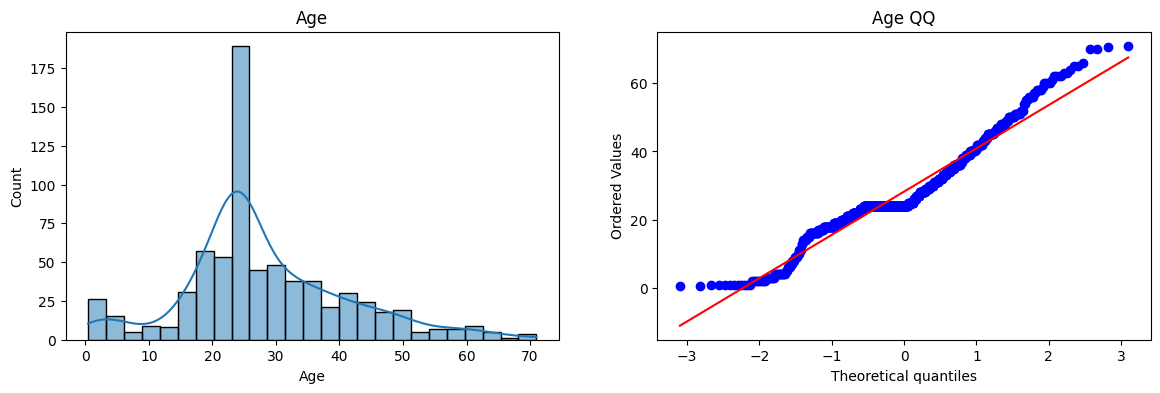

In [51]:
from scipy import stats

# Age graph
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(x_train['Age'], kde=True)
plt.title('Age')

plt.subplot(122)
stats.probplot(x_train['Age'], dist='norm', plot=plt)
plt.title('Age QQ')

plt.show()

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


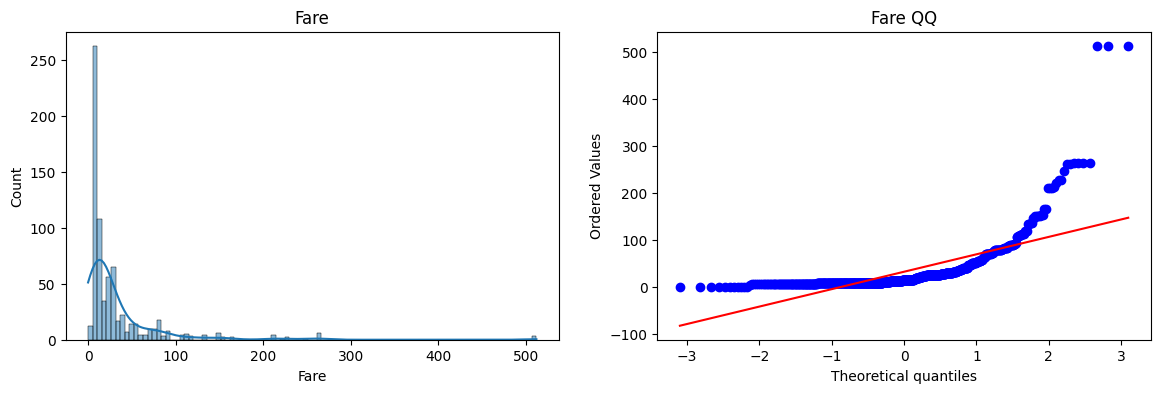

In [52]:
# Fare graph
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(x_train['Fare'], kde=True)
plt.title('Fare')

plt.subplot(122)
stats.probplot(x_train['Fare'], dist='norm', plot=plt)
plt.title('Fare QQ')

plt.show()

In [55]:
def calc_accuracy():
    clf = LogisticRegression()
    clf2 = DecisionTreeClassifier()

    clf.fit(x_train,y_train)
    clf2.fit(x_train,y_train)

    y_pred = clf.predict(x_test)
    y_pred1 = clf2.predict(x_test)

    print(accuracy_score(y_test, y_pred))
    print(accuracy_score(y_test, y_pred1))

calc_accuracy()


0.6145251396648045
0.6536312849162011
